# Minicorneta - Working

# Inicialização

In [1]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
#--------------------
from collections.abc import Iterable
import os
import glob
import sys
import astropy.units as u
from astropy.io import fits
from astropy.time import Time
import dask.dataframe as dd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import scipy.signal
import scipy.ndimage
# import scipy as sp
# Local imports
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope/GNURadio")))
from radiotelescope.observations.observations import Observations as Obs
from radiotelescope.instruments import RTLSDRGNU
from radiotelescope.observations.observations import plot_mosaic
import utils

fuso = RTLSDRGNU.instrument.timezone

Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
Para observações conecte o dongle na porta USB local.


## Coordenadas Celestes

In [38]:
utils.altaz2gal(21, 33)
utils.gal2altaz(0, 180)

(60.2, 163.2)

(43.8, 322.8)

In [39]:
TIME = fuso.localize(pd.to_datetime("2023-05-10 00:30:00"))
utils.altaz2gal(75, 0, TIME=TIME)

(38.0, 21.1)

In [44]:
TIME = fuso.localize(pd.to_datetime("2023-05-10 23:59:00"))
utils.gal2altaz(0, 0, TIME=TIME)

(54.9, 131.9)

## Lendo Dados

In [4]:
begin_baseline = fuso.localize(pd.to_datetime("2023-05-09 00:00:00"))
baseline_folder = "../data/raw/GNURADIO/BASELINES/"
# TImestamp de captura dos dados.
begin = fuso.localize(pd.to_datetime("2023-05-10 00:00:00"))

In [5]:
def data_minihorn(begin=None, name=None, freqs=None, begin_baseline=begin_baseline, baseline_folder=baseline_folder):
    obs_base = utils.load_radiodata(begin=begin_baseline, name="minicorneta_1420_baseline", 
                                     folder=baseline_folder, mode="01")
    obs = utils.load_radiodata(begin=begin, name=name)
    if freqs is not None:
        data = obs.filter_data(obs.data, freqs=freqs)
        data_base = obs_base.filter_data(obs.data, freqs=freqs)
    else:
        data = obs.data
        data_base = obs_base.data
    data_sub, baseline = utils.baseline_subtract(data, data_base, window_length=71)
    b, l = tuple(obs.backend.name.split("_")[-2:])
    return data_sub, baseline, b, l

In [26]:
def plot_spectra(data, normalize=True, baseline=True, threshold=.1, distance=None, width=None):
    if not isinstance(data, list):
        data = [data]
    fig, ax = plt.subplots(figsize=(12,4))
    for datum in data:
        if normalize:
            values = utils.normalize(datum[0])
            base_data = utils.normalize(datum[1])
        else:
            values=datum[0]         
            base_data = datum[1]
        label = "b={}, l={}".format(datum[2], datum[3])
        utils.plot_median(values, threshold=threshold, distance=distance, width=width, ax=ax, label=label)
    if baseline:
        ax.plot(values.columns, base_data, label="baseline")
    ax.legend()
    return ax

In [27]:
mh_46_145 = data_minihorn(begin=begin, name="minicorneta_1420_46_145", freqs=[1420, 1421]);
mh_54_165 = data_minihorn(begin=begin, name="minicorneta_1420_54_165", freqs=[1420, 1421]);
mh_55_350 = data_minihorn(begin=begin, name="minicorneta_1420_55_350", freqs=[1420, 1421]);
mh_57_322 = data_minihorn(begin=begin, name="minicorneta_1420_57_322", freqs=[1420, 1421]);
mh_67_350 = data_minihorn(begin=begin, name="minicorneta_1420_67_350", freqs=[1420, 1421]);


Dados tem 13.59 Mb
Dados tem 1.80 Mb
Dados tem 13.59 Mb
Dados tem 1.89 Mb
Dados tem 13.59 Mb
Dados tem 6.46 Mb
Dados tem 13.59 Mb
Dados tem 5.55 Mb
Dados tem 13.59 Mb
Dados tem 7.15 Mb


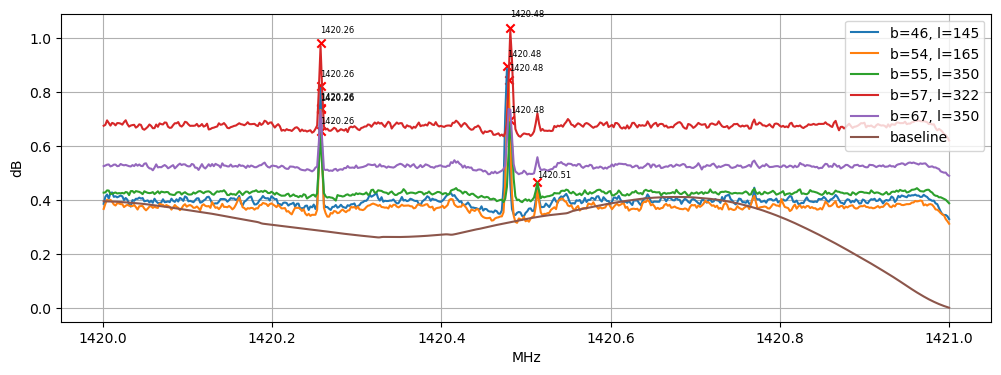

In [33]:
plot_spectra([mh_46_145, mh_54_165, mh_55_350, mh_57_322, mh_67_350], threshold=0.05);